In [19]:
import boto3


# 設定你的 Endpoint 名稱
endpoint_name = input('輸入 Endpoint 名稱')


# 建立 SageMaker 控制面 (Control Plane) 的 client
sm_client = boto3.client('sagemaker')


try:
    # 呼叫 API 查詢該 Endpoint 下的所有元件
    response = sm_client.list_inference_components(
        EndpointNameEquals=endpoint_name
    )
    
    components = response.get('InferenceComponents', [])
    
    if not components:
        print("⚠️ 奇怪，API 回傳這個 Endpoint 沒有 Inference Component。")
        print("如果真的沒有，請檢查你的 Endpoint 是否狀態為 InService。")
    else:
        
        for comp in components:
            inference_component = comp['InferenceComponentName']
            print("呼叫成功")


except Exception as e:
    print(f"查詢失敗，錯誤訊息：{e}")




輸入 Endpoint 名稱 jumpstart-dft-stable-diffusion-v2-1-20260124-072149


呼叫成功


In [21]:
import boto3
import json
import base64
from PIL import Image
import io



# 1. 建構 boto3 client
runtime = boto3.client('runtime.sagemaker')


# 2. 準備 Prompt
prompt = input("輸入自己的Prompt")
#ex:”cartoon illustration of a cute MyMelody, vibrant colors, clean lines, sharp focus, anime style”(根據自己JSON裡面的內容下prompt)


# 3. 發送請求
response = runtime.invoke_endpoint(
    EndpointName = endpoint_name,
    InferenceComponentName = inference_component,
    ContentType='application/json',
    Body=json.dumps({
        "prompt": prompt,
        "guidance_scale": 7.5,
        "num_inference_steps": 50,
    })
)



# 4. 解析回傳的圖片
response_body = json.loads(response['Body'].read().decode())

print("Keys available in response:", response_body.keys())
print("呼叫成功")



輸入自己的Prompt "A masterpiece trading card art of Hello kitty, [a photo of Hello kitty], magical sparkling aura, holographic rainbow background, shimmering crystal textures, diamond patterns, vibrant cinematic lighting, intricate gold filigree borders, Japanese TCG aesthetic, sharp focus, 8k resolution."


Keys available in response: dict_keys(['generated_images', 'prompt'])
呼叫成功


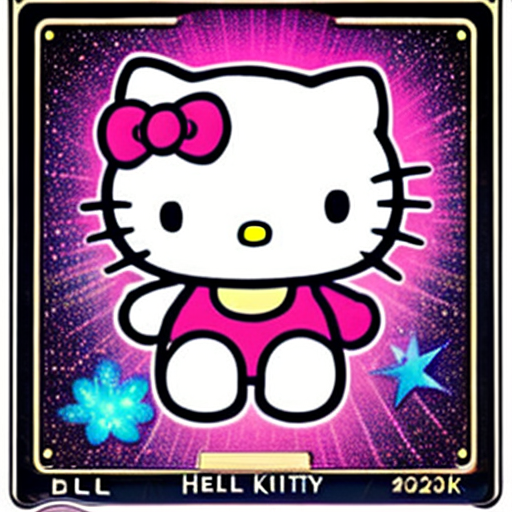

In [22]:
import numpy as np
from PIL import Image


# 1. 取得 raw pixel data (這是一個包含 RGB 數值的 nested list)
generated_image_data = response_body['generated_images'][0]


# 2. 將 List 轉成 NumPy array，並強制指定型態為 uint8 (因為像素值是 0-255)
image_array = np.array(generated_image_data).astype('uint8')


# 3. 使用 PIL 直接從 array 建立圖片
image = Image.fromarray(image_array)


# 4. 顯示圖片
display(image)



